Osnabrück University - Computer Vision (Winter Term 2020/21) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available on Saturday and are supposed to be solved in groups of three. They have to be handed in before Sunday morning of the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass 𝑁−2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before the end of **Saturday, November 07, 2020**. Please upload your results to your group's Stud.IP folder. In case you cannot do this first sheet (due to technical or organizational problems) please upload a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and you may hand in this sheet together with the second sheet one week later.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

Convolution in terms of image processing means a moving kernel thats manipulating one pixel of this kernel in respect to the surrounding pixels. With convolution support filter-patches can be implemented.

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

Convolution is linear as the conditions for linearity are met: You can multiply the grey values befor or after the convolution and still get the same result. Furthermore you can overlay two images before or after convolution and get the same results (as long as there is not dataloss).

Definition of a homogenous fuction:

f(λx1, ... λxn) = λ^r f(x1,... , xn)

If you plug in the λ for every variable you can exclude it again. This means the function is homogenous.

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

Multiplications: (2m+1)*(2n+1)*(x-1)*(y-1) if we leave out boarders 

Multiplications: (2m+1)*(2n+1)*(x)*(y) if we assign null to "Pixels" out of picture

Additions: ((2m+1)*(2n+1))-1)*(x)*(y) if we assign null to "Pixels" out of picture

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *1c)*. This is a shorter notation.

A seperable kernel is a kernel that can be expressed as a product of a row-vector and a column vektor. You reduce the matrix operations to column- and row operation.

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

In [2]:
scipy.ndimage.filters.convolve?

Object `scipy.ndimage.filters.convolve` not found.


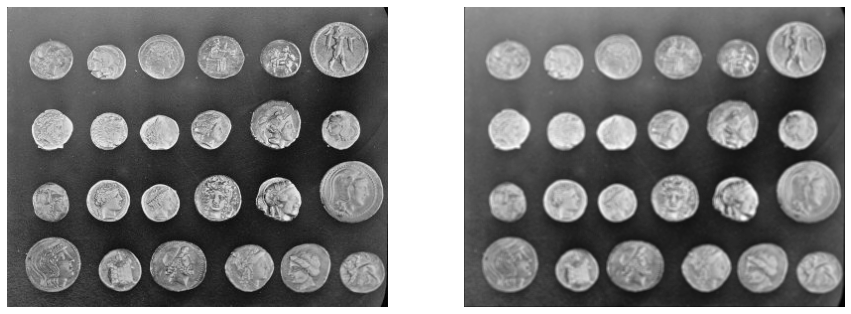

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from imageio import imread
from skimage import data
from scipy import ndimage

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

weight_array=1/9 * np.array([[1,1,1],[1,1,1],[1,1,1]])

filtered_image = scipy.ndimage.filters.convolve(image, weight_array, mode='constant', cval=0.0)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

This filter blurrs the image by some factor. Usefull in picture manipulation, for example to reduce noise.

### b) Gaussian filter

You may try different filter sizes.

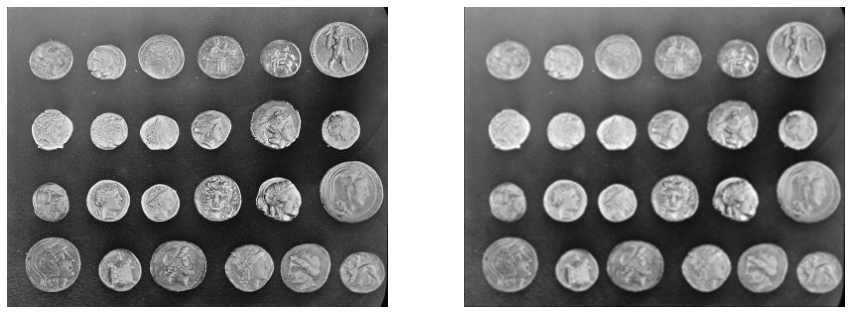

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

weight_array=1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])

filtered_image = scipy.ndimage.filters.convolve(image, weight_array, mode='constant', cval=0.0)
# YOUR CODE HERE

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

This filter blurrs the image by some factor. This filter blurrs the image. Usefull in picture manipulation, for example to reduce noise.

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

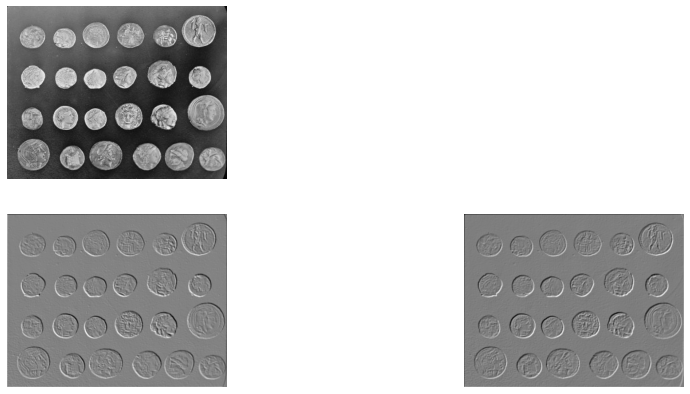

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

weight_array_1=1/4 *np.array([[0,-1,-2],[1,0,-1],[2,1,0]])

filtered_image = scipy.ndimage.filters.convolve(image, weight_array_1, mode='constant', cval=0.0)

weight_array_2=1/4 *np.array([[-2,-1,0],[-1,0,1],[0,1,2]])

filtered_image_2 = scipy.ndimage.filters.convolve(image, weight_array_2, mode='constant', cval=0.0)
# YOUR CODE HERE

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,3)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,4)
plt.imshow(filtered_image_2, cmap = 'gray')
plt.axis('off')
plt.show()

Edge Detection for example. The original pixel value at the calculated spot is ignored and just the surroundings has an effect on the pixel itself. If the pixels surrounding the original have the same value the claculated pixel is zero.

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


YOUR ANSWER HERE

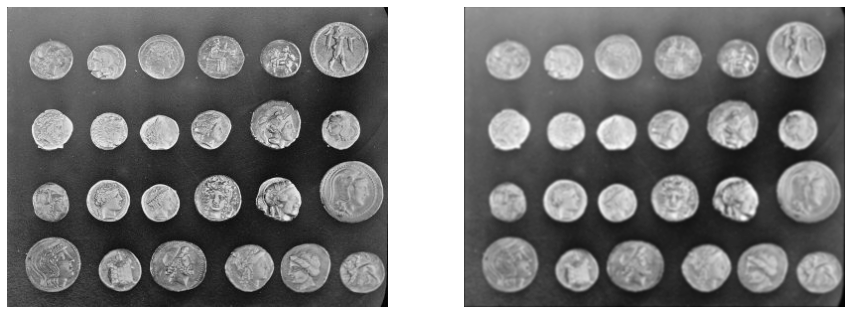

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 10

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

unsharped_mask_image = scipy.ndimage.filters.convolve(image, gauss_5, mode='constant', cval=0.0) # replace this by your solution
# YOUR CODE HERE

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(unsharped_mask_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

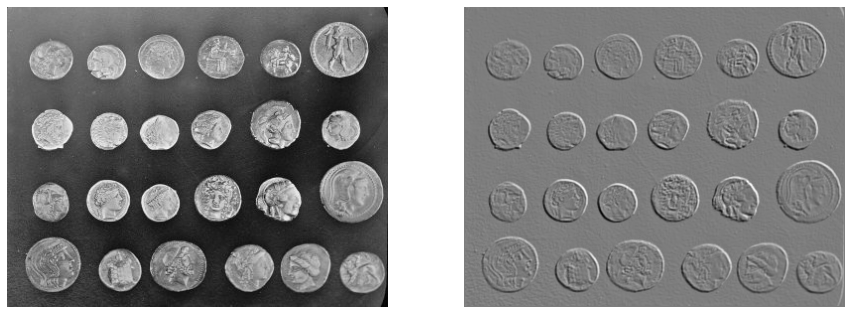

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    
    # Dimension des Bildes
    M,N = img.shape
    
    # Dimension des Kernels
    m,n = kern.shape

    #Modulo der Kerneldimension
    mh, nh = (m//2, n//2)
    
    #Matritzen auffüllen
    result = np.zeros((M,N))
    
    """# und y als Koordinaten des Bildes. Anstatt den Rand des Bildes mit nullen auffüllen beginnt die Manipulation bereits 
     auf der Position die der Hälfte des Kernels entspricht"""
    x=nh
    y=mh
    
    # Initialisieren der "Läufer"-Variablen des Kernels
    ml=0
    nl=0
    
    #Initialisieren der Wert-Variable. Diese speichert das Ergebnis der Convolution während der Schleifendurchläufe.
    wert=0
    
    #Die erste Schleife läuft bis zur letzten Spalte des Bildes minus der hälfte der Dimension des Kernels in dieser Richtung.
    #Die äußeren Pixel werden nicht bearbeitet.
    while x != M-(mh):
            
            #Die zweite Schleife läuft bis zur letzten Reihe des Bildes minus der hälfte der Dimension des Kernels in dieser Richtung.
            #Die äußeren Pixel werden nicht bearbeitet.
        while y != N-(nh):
            
            #Der Kernel wird in horizontaler Richtung durchlaufen
            while ml != m:
                
                #Der Kernel wird in vertikaler Richtung durchlaufen
                while nl != n:
                    
                    #Multiplikation zwischen Kernelwert und Bildwert inkl. Addition zum Wert des Kernels
                    wert=wert+img[x-mh+ml][y-nh+nl]*kern[ml][nl]
                    
                    #Hochzählen der Kernelspalte
                    nl=nl+1
                
                #Zurücksetzen des Kernelspaltenläufers
                nl=0
                
                #Hochzählen der Kernelspalte
                ml=ml+1
            
            #Speichern des Wertes an Position (x|y) des Bildes 
            result[x][y]=wert
            
            #Zurücksetzen der Variablen
            ml=0
            wert=0
            
            #Aktivierung der nächsten Spalte
            y=y+1
            
        #Zurücksetzen der Variable auf den Startwert der Spalte
        y=nh
        
        #Aktivierung der nächsten Reihe
        x=x+1
        
    return result

image = data.coins().astype(np.float32)

box_3 = 1/16 * np.array([[0,-1,-2],[1,0,-1],[2,1,0]])

filtered_image = my_convolve2d(image,box_3)

fig = plt.figure(figsize=(15,7))

a=fig.add_subplot(1,2,1)

plt.imshow(image, cmap = 'gray')

plt.axis('off')

a=fig.add_subplot(1,2,2)

plt.imshow(filtered_image, cmap = 'gray')

plt.axis('off')

plt.show()
